# Mission 4
Pour cette mission 4, nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.


Appliquez une régression linéaire sur vos données, en incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu. Quel est le pourcentage de variance expliquée par votre modèle ?

- Pour chacune des régressions suivantes, vous testerez 2 version : l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln), l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux question.



Selon ce modèle, donnez la décomposition de variance totale expliquée par :

le pays de naissance (ie. le revenu moyen et l’indice de Gini) ;
les autres facteurs non considérés dans le modèle (efforts, chance, etc.).
Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ?

## Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Importation des données

In [2]:
# Données créées dans le précedent notebook
data = pd.read_csv("/Users/teilo/Desktop/OC - Projet 7/predictions_revenus/dataframe.csv")
data = data.drop(columns='Unnamed: 0')
data

,Name,c_i_child,y_child,Gj,pj,c_i_parent,rev_moy,ln_y_child,ln_rev_moy
0,Albania,1,728.89795,0.304624,0.815874,1.0,2994.829902,6.591534,8.004643
1,Albania,1,728.89795,0.304624,0.815874,1.0,2994.829902,6.591534,8.004643
2,Albania,1,728.89795,0.304624,0.815874,1.0,2994.829902,6.591534,8.004643
3,Albania,1,728.89795,0.304624,0.815874,1.0,2994.829902,6.591534,8.004643
4,Albania,1,728.89795,0.304624,0.815874,1.0,2994.829902,6.591534,8.004643
...,...,...,...,...,...,...,...,...,...
3249995,South Africa,100,82408.55000,0.669779,0.677000,100.0,5617.904880,11.319444,8.633714
3249996,South Africa,100,82408.55000,0.669779,0.677000,100.0,5617.904880,11.319444,8.633714
3249997,South Africa,100,82408.55000,0.669779,0.677000,100.0,5617.904880,11.319444,8.633714
3249998,South Africa,100,82408.55000,0.669779,0.677000,100.0,5617.904880,11.319444,8.633714


## Analyse de la variance (ANOVA)

In [3]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

#### 1. Analyse par pays

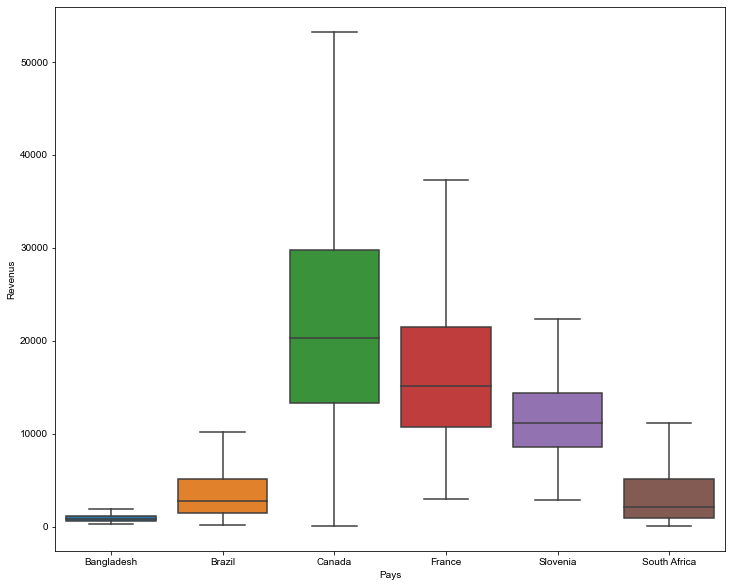

Eta^2 = 0.3515266280113387


In [4]:
# Selection des pays à analyser
countries = data.loc[(data['Name'] == 'France') | (data['Name'] == 'Brazil') | 
            (data['Name'] == 'Canada') | (data['Name'] == 'Bangladesh') |
            (data['Name'] == 'South Africa') | (data['Name'] == 'Slovenia')]

plt.figure(figsize=(12,10))
sns_plot = sns.boxplot(y='y_child', x='Name', data=countries,showfliers=False)
sns.set_theme()
plt.xlabel("Pays")
plt.ylabel("Revenus")
plt.show()

print("Eta^2 =", eta_squared(countries['Name'], countries['y_child']))

On remarque qu'il existe une grande disparité entre les différents pays. 

In [5]:
# Ordinary least squared
model = ols('y_child ~ Name', data = countries).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq        df             F  PR(>F)
Name      1.921300e+13       5.0  32524.351438     0.0
Residual  3.544288e+13  299994.0           NaN     NaN


## Regression linéaire

#### a. revenu moyen + indice de Gini

In [6]:
# X et Y
X = data[['rev_moy', 'Gj']]
Y = data['y_child']


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [8]:
# Creation du model
model = linear_model.LinearRegression()

In [9]:
# Entrainement du model
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# Prediction
y_pred = model.predict(x_test)

In [11]:
# Performance du model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error: %.3f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient de determination (R^2): %.3f'
     % r2_score(y_test, y_pred))

Coefficients: [ 1.00055796 13.37387971]
Intercept: -6.924758490363274
Mean Squared Error: 63139450.008
Coefficient de determination (R^2): 0.468


In [12]:
# Y = coefficient1*(rev_moy) + coefficient2*(Gj) + Intercept

In [13]:
# Result de Mean Absolute Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Resutat de Mean Squared Error
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))

# Resultat de MSE^2
print("MSE^2:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3758.5205394072077
Mean Squared Error 63139450.0082216
MSE^2: 7946.033602258525


Les résultats obtenus lors de cette regression linéaire ne sont pas satisfaisants. Le MSE à une grande valeur ce qui signifie que le modele ne permet pas de determiner correctement le revenu de l'enfant.

In [ ]:
sns.regplot(y_test, y_pred, marker='+', line_kws={"color": "red"})
plt.xlabel("Revenu")

/Users/teilo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
# Ordinary least squared
model = ols('y_child ~ rev_moy+Gj', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#### b. Revenu moyen (logarithmique) et indice de Gini

In [ ]:
# X et Y
X = data[['ln_rev_moy', 'Gj']]
Y = data['ln_y_child']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
# Creation du model
model = linear_model.LinearRegression()

In [ ]:
# Entrainement du model
model.fit(x_train, y_train)

In [ ]:
# Prediction
y_pred = model.predict(x_test)

In [ ]:
# Performance du model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error: %.3f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient de determination (R^2): %.3f'
     % r2_score(y_test, y_pred))

In [ ]:
# Y = coefficient1*(ln_rev_moy) + coefficient2*(Gj) + Intercept

In [ ]:
# Result de Mean Absolute Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Resutat de Mean Squared Error
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))

# Resultat de MSE^2
print("MSE^2:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Les résultats obtenus lors de cette regression linéaire sont meilleurs que ceux obtenus lors de la précèdente. Nous choisirons donc de continuer avec ce modele.

In [ ]:
sns.regplot(y_test, y_pred, marker='+', line_kws={"color": "red"})
plt.xlabel("Revenu (log)")

In [ ]:
# Ordinary least squared
model = ols('ln_y_child ~ ln_rev_moy+Gj', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#### c. Ajout de la classe des parents

In [ ]:
# X et Y
X = data[['ln_rev_moy', 'Gj', 'c_i_parent']]
Y = data['ln_y_child']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
# Creation du model
model = linear_model.LinearRegression()

In [ ]:
# Entrainement du model
model.fit(x_train, y_train)

In [ ]:
# Prediction
y_pred = model.predict(x_test)

In [ ]:
# Performance du model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error: %.3f'
     % mean_squared_error(y_test, y_pred))
print('Coefficient de determination (R^2): %.3f'
     % r2_score(y_test, y_pred))

In [ ]:
# Y = coefficient1*(ln_rev_moy) + coefficient2*(Gj) + coefficient3*(c_i_parent) + Intercept

In [ ]:
# Result de Mean Absolute Error
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))

# Resutat de Mean Squared Error
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_pred))

# Resultat de MSE^2
print("MSE^2:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

On remarque que cette regression linéaire est plus performante que les 2 précèdentes. 

Le coefficient de Gini est négative, ce qui signifie que le fait de vivre dans un pays inégalitaire défavorise les personnes habitant le pays.

In [ ]:
# Ordinary least squared
model = ols('ln_y_child ~ Name+c_i_parent', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)